In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
df = pd.read_csv("./Downloads/Social_Network_Ads.csv")

In [229]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [230]:
drop_col = ["User ID", "Gender"]
df.drop(columns=drop_col, inplace=True)


In [231]:
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [232]:
df["EstimatedSalary"].mean()

69742.5

In [233]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

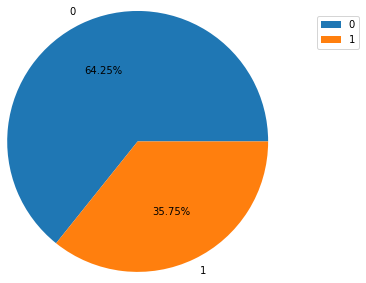

In [234]:
plt.pie(df["Purchased"].value_counts().values, labels = df["Purchased"].value_counts().index,  autopct='%1.2f%%', radius=1.5)
plt.legend(bbox_to_anchor=(1.3, 1.1))

plt.show() 

In [235]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [236]:
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [237]:
X = df.iloc[:, :-1]

In [238]:
y= df.iloc[:,-1]

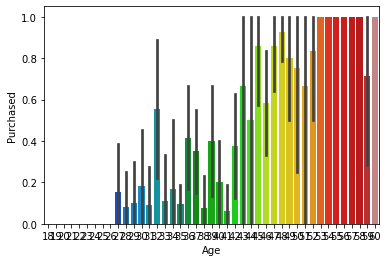

In [239]:
sns.barplot(x = df["Age"], y = df["Purchased"], palette = "nipy_spectral");

In [280]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.15, random_state=40)

In [281]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [282]:
X_train

array([[-1.72669844e+00,  4.62164905e-01],
       [ 2.11040920e+00,  9.22131440e-01],
       [ 2.87783073e-01,  5.96941863e-02],
       [-8.63349219e-01,  2.24453523e+00],
       [-1.91855382e+00, -7.45247250e-01],
       [-6.71493837e-01,  1.74685820e-01],
       [ 0.00000000e+00, -2.56532806e-01],
       [-9.59276910e-02, -1.06147424e+00],
       [ 8.63349219e-01, -1.34895333e+00],
       [-5.75566146e-01, -1.49269287e+00],
       [-1.53484306e+00, -1.23396169e+00],
       [ 0.00000000e+00,  1.23835843e+00],
       [-2.87783073e-01,  1.45937912e-01],
       [-1.43891537e+00, -1.20521378e+00],
       [-2.87783073e-01,  5.96941863e-02],
       [ 1.43891537e+00, -1.03272633e+00],
       [-1.72669844e+00, -9.75230517e-01],
       [ 6.71493837e-01, -1.37770124e+00],
       [-1.05520460e+00, -3.42776532e-01],
       [-1.53484306e+00, -1.49269287e+00],
       [-6.71493837e-01,  1.38209797e+00],
       [-6.71493837e-01, -5.52974474e-02],
       [ 2.87783073e-01,  3.09462779e-02],
       [ 1.

In [283]:
from sklearn.linear_model import LogisticRegression  
regressor = LogisticRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [284]:
y_pred = regressor.predict(X_test)

In [285]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [286]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.85


In [287]:
df.iloc[248,:]

Age                   41
EstimatedSalary    52000
Purchased              0
Name: 248, dtype: int64

In [288]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
132,0,0
390,1,1
310,0,0
3,0,0
248,0,0
256,0,0
254,0,1
42,0,0
371,1,1
292,1,1


In [289]:
data["Predicted"].value_counts()

0    47
1    13
Name: Predicted, dtype: int64

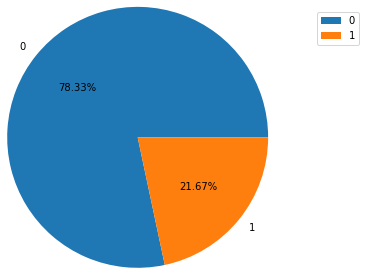

In [290]:
plt.pie(data["Predicted"].value_counts().values, labels = data["Predicted"].value_counts().index,  autopct='%1.2f%%', radius=1.5)
plt.legend(bbox_to_anchor=(1.3, 1.1))

plt.show() 